## 1. Libraries, Constants,Utility Functions, and Loading in the Datasets

In [1]:
!pip install pandas numpy nltk scikit-learn wordcloud\
seaborn gensim tensorflow imblearn xgboost matplotlib unrar pyunpack more-itertools patool keras-tqdm > /dev/null

The system cannot find the path specified.


In [2]:
UTILS_URL = 'https://f005.backblazeb2.com/file/gp-support-files/archived_nlp_ai_utils.py'
UPDATING_VALUES_URL = 'https://f005.backblazeb2.com/file/gp-support-files/archived_updating_values.py'
ALL_LIBS_URL = 'https://f005.backblazeb2.com/file/gp-support-files/archived_all_libs_dl.py'
UTILS_FILE_NAME = 'archived_nlp_ai_utils'
UPDATING_VALUES_FILE_NAME = 'archived_updating_values'
ALL_LIBS_FILE_NAME = 'archived_all_libs_dl'
FILE_EXT = '.py'

In [3]:
import requests
import os
import math

In [4]:
def get_dependencies(url,file_name,file_extension):
    if os.path.exists(file_name + file_extension):
        return print(file_name + " already exists.")
    else:
        print(f"downloading {file_name}...")
        r = requests.get(url)
        with open(file_name + file_extension, 'wb') as fd:
            for chunk in r.iter_content():
                fd.write(chunk)

In [5]:
get_dependencies(UTILS_URL,UTILS_FILE_NAME,FILE_EXT)
get_dependencies(UPDATING_VALUES_URL,UPDATING_VALUES_FILE_NAME,FILE_EXT)
get_dependencies(ALL_LIBS_URL,ALL_LIBS_FILE_NAME,FILE_EXT)

archived_nlp_ai_utils already exists.
archived_updating_values already exists.
archived_all_libs_dl already exists.


In [6]:
from archived_nlp_ai_utils import *

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already u

In [7]:
DATASETS_DIR = '../datasets/'

In [8]:
mustard_dataset = pd.read_json(DATASETS_DIR + 'MUStARD_text_only_data.json') 

headlines_df = pd.read_json(DATASETS_DIR + 'Sarcasm_Headlines_Dataset_v2.json', lines=True) 

reddit_df = pd.read_csv(DATASETS_DIR + 'sarcasm_on_reddit.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_12948\2099538317.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_df = pd.read_csv(DATASETS_DIR + 'sarcasm_on_reddit.csv')


In [9]:
def distil_dataset(df,text_colname,labels_colname):
    df.rename(columns={text_colname:'text',labels_colname:'labels'},inplace=True)
    df = df[['text','labels']].copy()
    df.reset_index(inplace=True)
    df.drop('index',axis = 1,inplace=True)
    return df

In [10]:
def create_chunk(data,start_size,end_size):
    chunk = data.iloc[start_size:end_size]
    return chunk

## 2. Data Cleaning

In [11]:
mustard_dataset

,160,170,180,190,1105,1162,1175,1182,1213,1276,...,2623,2131,2236,2546,2242,2169,2235,234,2608,2524
utterance,It's just a privilege to watch your mind at work.,I don't think I'll be able to stop thinking ab...,"Since it's not bee season, you can have my epi...","Lois Lane is falling, accelerating at an initi...",I'm just inferring this is a couch because the...,"Sheldon, if you were a robot, and I knew and y...",If you're compiling a mix CD for a double suic...,No. The dark crescent-shaped patterns under yo...,"How's this? ""Pleased to meet you, Dr. Gablehau...","Yeah, my parents felt that naming me Leonard a...",...,What do you know? Its a treat for the eyes and...,I really don't wanna sit with Allen Iverson ov...,"Gee, if only she were one and had no idea what...","Oh sure, she was probably up all night excited...",Are you still enjoying your nap?,"Hes not right for the part, and if I suggest h...","Oh yeah he has a caretaker his older brother, ...",Is it me or the greetings gone downhill around...,"You are right, by saying nice, I am virtually ...","Yes and we are ""very"" excited about it."
speaker,SHELDON,PENNY,SHELDON,SHELDON,SHELDON,HOWARD,SHELDON,SHELDON,SHELDON,LEONARD,...,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER
context,[I never would have identified the fingerprint...,[This is one of my favorite places to kick bac...,"[Here we go. Pad thai, no peanuts., But does i...",[A marathon? How many Superman movies are ther...,"[Great Caesar's ghost, look at this place., So...","[On the other hand, no arousal., None?, None.,...","[Oh, good Lord., God, that's a good song.]","[How do I look?, Could you be more specific?, ...","[You know, I am not going to enjoy this party....",[He switched over to high-energy radiation res...,...,"[Chandler?, Hey! Ah!, What do you think?, I th...",[Wish I could switch with someone.],"[You can't go away this weekend, its Emma's bi...","[Hey, Hey, where's the birthday girl?, Oh she ...","[Okay?, Hi Emma, it's the year 2020.]","[What am I gonna do now?, Just pass the tape a...","[Helo! Anybody in there order a celebrity?, Wh...","[Hey, You son of a bitch!]","[Did I go to this school?, Hey, there's Missy ...","[Anyway, if you don't feel like being alone to..."
context_speakers,"[LEONARD, SHELDON]","[HOWARD, PENNY, HOWARD, HOWARD, HOWARD, PENNY,...","[LEONARD, HOWARD, LEONARD]","[PENNY, SHELDON, PENNY, SHELDON, SHELDON, PENN...","[SHELDON, LEONARD, SHELDON, SHELDON, SHELDON, ...","[PERSON, LEONARD, PERSON, LEONARD, PERSON, LEO...","[SHELDON, LEONARD]","[LEONARD, SHELDON, LEONARD]","[SHELDON, LEONARD, SHELDON, LEONARD, SHELDON, ...","[PERSON, PERSON, LEONARD, PERSON, LEONARD, PER...",...,"[PHOEBE, CHANDLER, MONICA, CHANDLER]",[CHANDLER],"[RACHEL, MONICA, RACHEL]","[MONICA, CHANDLER, RACHEL]","[ROSS, CHANDLER]","[CHANDLER, RACHEL]","[JOEY, PERSON, CHANDLER, PERSON]","[CHANDLER, JOEY]","[CHANDLER, ROSS, CHANDLER, ROSS]",[ROSS]
show,BBT,BBT,BBT,BBT,BBT,BBT,BBT,BBT,BBT,BBT,...,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS
sarcasm,True,True,False,False,True,False,True,True,True,True,...,True,False,True,True,True,True,False,True,True,True


In [12]:
mustard_df = mustard_dataset.T

In [13]:
mustard_df['sarcasm'] = mustard_df['sarcasm'].astype(int)
mustard_df.head()

,utterance,speaker,context,context_speakers,show,sarcasm
160,It's just a privilege to watch your mind at work.,SHELDON,[I never would have identified the fingerprint...,"[LEONARD, SHELDON]",BBT,1
170,I don't think I'll be able to stop thinking ab...,PENNY,[This is one of my favorite places to kick bac...,"[HOWARD, PENNY, HOWARD, HOWARD, HOWARD, PENNY,...",BBT,1
180,"Since it's not bee season, you can have my epi...",SHELDON,"[Here we go. Pad thai, no peanuts., But does i...","[LEONARD, HOWARD, LEONARD]",BBT,0
190,"Lois Lane is falling, accelerating at an initi...",SHELDON,[A marathon? How many Superman movies are ther...,"[PENNY, SHELDON, PENNY, SHELDON, SHELDON, PENN...",BBT,0
1105,I'm just inferring this is a couch because the...,SHELDON,"[Great Caesar's ghost, look at this place., So...","[SHELDON, LEONARD, SHELDON, SHELDON, SHELDON, ...",BBT,1


In [14]:
mustard_df = distil_dataset(mustard_df,'utterance','sarcasm')

In [15]:
print(mustard_df.head())
print(mustard_df.shape)

                                                text  labels
0  It's just a privilege to watch your mind at work.       1
1  I don't think I'll be able to stop thinking ab...       1
2  Since it's not bee season, you can have my epi...       0
3  Lois Lane is falling, accelerating at an initi...       0
4  I'm just inferring this is a couch because the...       1
(690, 2)


In [16]:
headlines_df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [17]:
headlines_df = distil_dataset(headlines_df,'headline','is_sarcastic')

In [18]:
print(headlines_df.head())
print(headlines_df.shape)

                                                text  labels
0  thirtysomething scientists unveil doomsday clo...       1
1  dem rep. totally nails why congress is falling...       0
2  eat your veggies: 9 deliciously different recipes       0
3  inclement weather prevents liar from getting t...       1
4  mother comes pretty close to using word 'strea...       1
(28619, 2)


In [19]:
reddit_df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2.0,-1.0,-1.0,2016-10,16-10-16 23:55,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,-1.0,-1.0,2016-11,01-11-16 0:24,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,3.0,0.0,2016-09,22-09-16 21:45,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,-1.0,-1.0,2016-10,18-10-16 21:03,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,-1.0,-1.0,2016-12,30-12-16 17:00,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010822,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2.0,2.0,0.0,2009-04,25-04-09 0:47,"No one is calling this an engineered pathogen,..."
1010823,1,"whatever you do, don't vote green!",BCHarvey,climate,1.0,1.0,0.0,2009-05,14-05-09 22:27,In a move typical of their recent do-nothing a...
1010824,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1.0,1.0,0.0,2009-01,11-01-09 0:22,Screw the Disabled--I've got to get to Church ...
1010825,1,The Slavs got their own country - it is called...,catsi,worldnews,1.0,1.0,0.0,2009-01,23-01-09 21:12,I've always been unsettled by that. I hear a l...


In [20]:
reddit_df = distil_dataset(reddit_df,'comment','label')

In [21]:
print(reddit_df.head())
print(reddit_df.shape)

                                                text labels
0                                         NC and NH.      0
1  You do know west teams play against west teams...      0
2  They were underdogs earlier today, but since G...      0
3  This meme isn't funny none of the "new york ni...      0
4                    I could use one of those tools.      0
(1010827, 2)


In [22]:
total_df = pd.concat([mustard_df,headlines_df,reddit_df])

In [23]:
total_df

,text,labels
0,It's just a privilege to watch your mind at work.,1
1,I don't think I'll be able to stop thinking ab...,1
2,"Since it's not bee season, you can have my epi...",0
3,"Lois Lane is falling, accelerating at an initi...",0
4,I'm just inferring this is a couch because the...,1
...,...,...
1010822,I'm sure that Iran and N. Korea have the techn...,1
1010823,"whatever you do, don't vote green!",1
1010824,Perhaps this is an atheist conspiracy to make ...,1
1010825,The Slavs got their own country - it is called...,1


In [24]:
total_df.duplicated().sum()

42694

In [25]:
total_df.drop_duplicates(inplace=True)

In [26]:
total_df['text'].replace('', np.nan, inplace=True)
total_df.isnull().sum()

text      4
labels    0
dtype: int64

In [27]:
total_df.dropna(inplace=True)

In [28]:
classes = get_classes_count(total_df['labels'])

In [29]:
classes

[{0: 468494}, {1: 464788}, {2: 32665}, {3: 31491}]

In [30]:
total_df['labels'].unique()

array([1, 0, '1', '0'], dtype=object)

In [31]:
total_df['labels'] = [int(label) for label in total_df['labels']]

In [32]:
total_df['labels'].unique()

array([1, 0], dtype=int64)

In [33]:
classes = get_classes_count(total_df['labels'])

classes

[{0: 501159}, {1: 496279}]

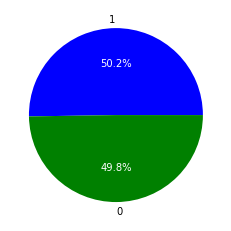

In [34]:
visualize_ratings_pie(total_df['labels'], use_dict = classes)

## 3. Separate Data Into Chunks, and Save as CSVs

In [35]:
total_df.shape

(997438, 2)

In [36]:
test = 'this is a test. I hope this is working correctly.'

this be a test i hope this be work correctly ==> Lemmatizer

thi be a test i hope thi be work correctli ==> Lemmatizer + Stemmer

In [39]:
process_corpus(remove_stop_words(test))

'test hope work correctly'

In [38]:
def split_data(total_df):
    data_rows = total_df.shape[0]
    data_chunks = []
    CHUNKS_COUNT = 10
    CHUNK_SIZE = math.ceil(data_rows / CHUNKS_COUNT)
    start_slice = 0
    chunk_slice = CHUNK_SIZE

    print(CHUNKS_COUNT)
    print(CHUNK_SIZE)
    print(start_slice)
    print(chunk_slice)

    for i in range(CHUNKS_COUNT):
        data_chunks.append(create_chunk(total_df,start_slice,chunk_slice))
        start_slice += CHUNK_SIZE
        chunk_slice += CHUNK_SIZE
    return data_chunks

In [39]:
data_chunks = split_data(total_df)

10
99744
0
99744


In [40]:
if not os.path.exists(DATASETS_DIR + 'sd_data_chunks'):
    os.mkdir(DATASETS_DIR + 'sd_data_chunks')

In [41]:
if not os.path.exists(DATASETS_DIR + 'preprocessed_sd_data_chunks'):
    os.mkdir(DATASETS_DIR + 'preprocessed_sd_data_chunks')

In [42]:
CHUNK_NAME = 'sd_chunk_'

In [43]:
SAVED_CHUNKS_DIR = DATASETS_DIR + 'sd_data_chunks/' + CHUNK_NAME

In [44]:
PREPROCESSED_SAVED_CHUNKS_DIR = DATASETS_DIR + 'preprocessed_sd_data_chunks/' + CHUNK_NAME

In [45]:
for itr,chunk in enumerate(data_chunks):
    chunk.to_csv(SAVED_CHUNKS_DIR + str(itr + 1) + '.csv',index=False)

In [46]:
all_dfs = []
for i,chunk in enumerate(data_chunks):
    all_dfs.append(pd.read_csv(SAVED_CHUNKS_DIR + str(i + 1) + ".csv"))

df_total = pd.concat(all_dfs)
df_total.shape

(997438, 2)

In [47]:
corpus = [process_corpus(text) for text in total_df['text']]

In [48]:
total_df['text'] = corpus

In [49]:
preprocessed_data_chunks = split_data(total_df)

10
99744
0
99744


In [50]:
for itr,chunk in enumerate(preprocessed_data_chunks):
    chunk.to_csv(PREPROCESSED_SAVED_CHUNKS_DIR + str(itr + 1) + '.csv',index=False)

In [51]:
all_dfs = []
for i,chunk in enumerate(preprocessed_data_chunks):
    all_dfs.append(pd.read_csv(SAVED_CHUNKS_DIR + str(i + 1) + ".csv"))

df_total_preprocessed = pd.concat(all_dfs)
df_total.shape

(997438, 2)

In [56]:
df_total.shape == total_df.shape

True

In [53]:
total_df.reset_index(inplace=True)
total_df.drop('index',axis=1,inplace=True)
df_total.reset_index(inplace=True)
df_total.drop('index',axis=1,inplace=True)
df_total_preprocessed.reset_index(inplace=True)
df_total_preprocessed.drop('index',axis=1,inplace=True)

In [59]:
df_total.shape == df_total_preprocessed.shape

True